# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 With the pie charts you can see that there is 49% female and 51% male, so they tried to get an even amount of both to see better how it effected each gender.
 Capomulin and Ramicane both had very low tumor volume mean, both were at 40 and most the other drug regimans had around 50.
 Out of the four regimens tested only one of them(Infubinol) had an outlier. The other ones did not have an outlier.
 For capomulin The correlation between mouse weight and the average tumor volume is 0.84
 For mouse l509 and the drug regimen capomulin it appears that as the days go on the tumor grows a little then shrinks a lot and continues this pattern throughout the tested days.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
totalMice = len(merged_df["Mouse ID"].unique())
totalMice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupes = merged_df[merged_df[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_dupes_id = mice_dupes["Mouse ID"].unique()
mice_dupes_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dupes_data = merged_df.loc[merged_df["Mouse ID"] == mice_dupes_id[0]]
mice_dupes_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMerged_df= merge_df = merged_df[merged_df["Mouse ID"]!="g989"]
cleanMerged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
updateMiceCount = len(cleanMerged_df["Mouse ID"].unique())
updateMiceCount

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_df = cleanMerged_df.groupby("Drug Regimen")
tumorMean = regimen_df["Tumor Volume (mm3)"].mean()
tumorMedian = regimen_df["Tumor Volume (mm3)"].median()
tumorVar = regimen_df["Tumor Volume (mm3)"].var()
tumorStdev = regimen_df["Tumor Volume (mm3)"].std()
tumorSEM = regimen_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Tumor Volume Mean" : tumorMean, 
                           "Tumor Volume Median" : tumorMedian,
                           "Tumor Volume Variance": tumorVar,
                           "Tumor Volume Std. Dev." : tumorStdev,
                           "Tumor Volume Std. Err." : tumorSEM})

summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggregations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
# Using the aggregation method, produce the same summary statistics in a single line
merged_df.groupby("Drug Regimen").agg(aggregations)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

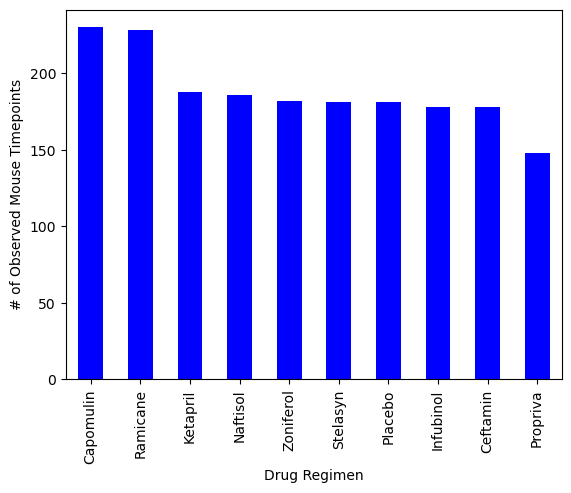

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
miceAndDrugs = cleanMerged_df[["Drug Regimen", "Timepoint"]]
micePerDrug = miceAndDrugs["Drug Regimen"].value_counts()

micePerDrug.plot(kind="bar", color="b", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")


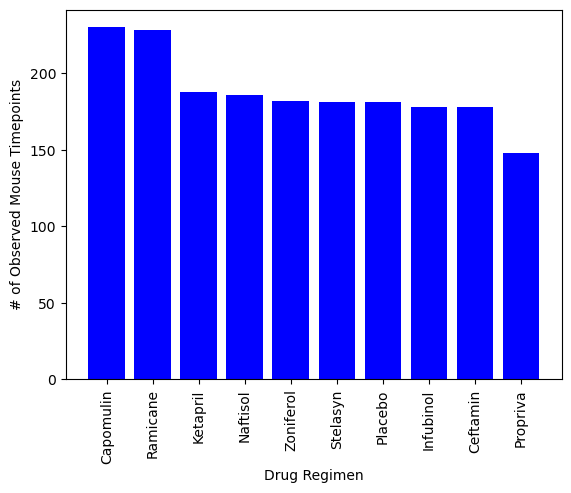

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = micePerDrug.index.values
miceCount1 = micePerDrug.values

plt.bar(drugs, miceCount1, color="b", align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

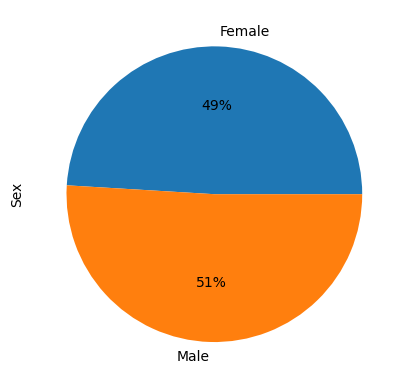

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = cleanMerged_df.groupby("Sex")
genderCount = gender_df["Sex"].count()
genderCount.plot(kind="pie", y="Sex",autopct="%1.0f%%")


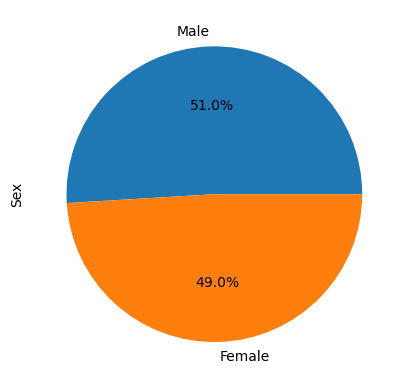

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexLabel = ["Male", "Female"]
count = [genderCount["Male"], genderCount["Female"]]
plt.pie(count, labels=sexLabel, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumorVol_df = cleanMerged_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
tumorVol_df = tumorVol_df.reset_index()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorVol_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


for treatment in treatments:

    tumorVolFin = tumorVol_df.loc[tumorVol_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumorVol.append(tumorVolFin)

    # Locate the rows which contain mice on each drug and get the tumor volumes

    quartiles = tumorVolFin.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    mean = tumorVolFin.mean()
    lowerBound = lowerq - (1.5 * iqr)
    upperBound = upperq + (1.5 * iqr)

    # Determine outliers using upper and lower bounds

    outliers = tumorVolFin.loc[(tumorVolFin < lowerBound) | (tumorVolFin > upperBound)]

    print(f"{treatment}:")
    print(f"Volume below {round(lowerBound,2)} could be an outlier")
    print(f"Volume above {round(upperBound, 2)} could be an outlier")
    print(f"Iqr is {round(iqr, 2)}")
    print(f"Number of outliers: {outliers.count()}")
    if outliers.count() >= 1:

        for i in outliers.index:

            print(f'Outlier volume is {round(outliers[i], 2)}')

    print("------------------------------------------------------------")


Capomulin:
Volume below 20.7 could be an outlier
Volume above 51.83 could be an outlier
Iqr is 7.78
Number of outliers: 0
------------------------------------------------------------
Ramicane:
Volume below 17.91 could be an outlier
Volume above 54.31 could be an outlier
Iqr is 9.1
Number of outliers: 0
------------------------------------------------------------
Infubinol:
Volume below 36.83 could be an outlier
Volume above 82.74 could be an outlier
Iqr is 11.48
Number of outliers: 1
Outlier volume is 36.32
------------------------------------------------------------
Ceftamin:
Volume below 25.36 could be an outlier
Volume above 87.67 could be an outlier
Iqr is 15.58
Number of outliers: 0
------------------------------------------------------------


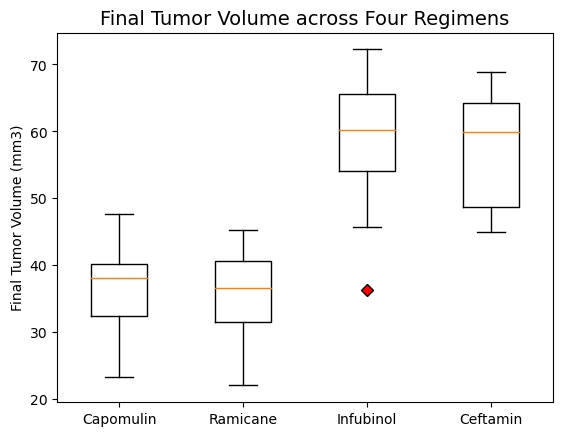

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_diamond = dict(markerfacecolor = "r", marker = "D")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumorVol, flierprops = red_diamond)
ax1.set_title("Final Tumor Volume across Four Regimens", fontsize = 14)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

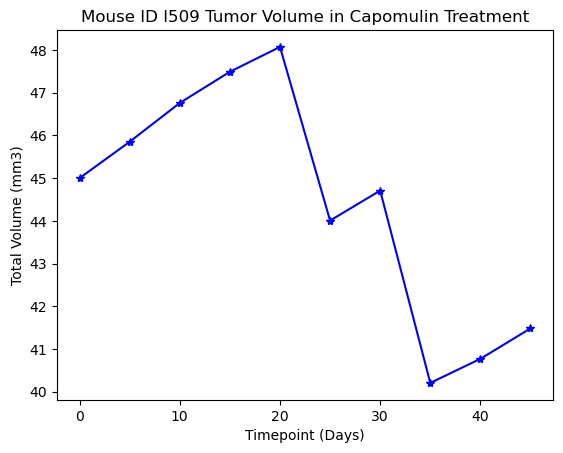

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = cleanMerged_df.loc[cleanMerged_df["Drug Regimen"] == "Capomulin"]
mouseID = "l509"
mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == mouseID]

plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], marker="*", color="b")
plt.title(f"Mouse ID {mouseID} Tumor Volume in Capomulin Treatment")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Total Volume (mm3)")
plt.show()

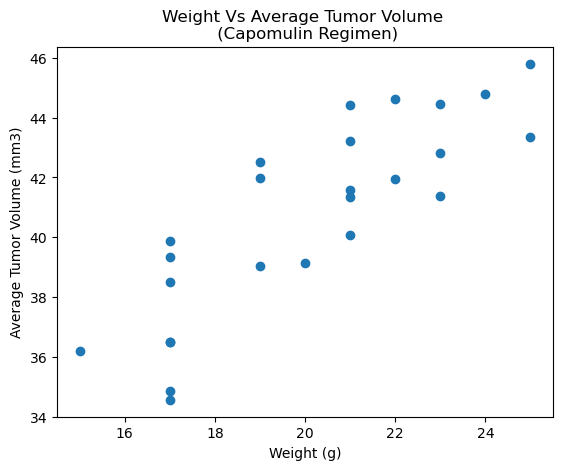

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
CapomulinWeight_df = Capomulin_df.groupby("Mouse ID")
avgWeightMice = CapomulinWeight_df["Weight (g)"].mean()
avgTumorMice = CapomulinWeight_df["Tumor Volume (mm3)"].mean()

plt.scatter(avgWeightMice, avgTumorMice)
plt.title("Weight Vs Average Tumor Volume \n (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


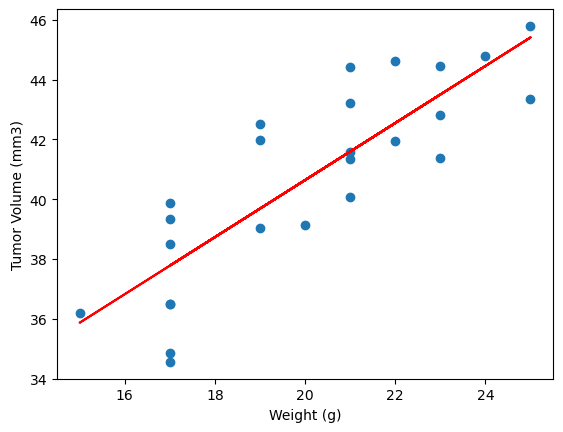

In [44]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (avgWeightMice,avgTumorMice)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = avgWeightMice
y_values = avgTumorMice
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avgWeightMice, avgTumorMice)
regressVal = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regressVal, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()